**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importndo algumas das principais biblioteca como pandas e matplot

In [ ]:
dataFrame = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')



Atribuir a uma variável o dataset escolhido

In [ ]:
dataFrame.head()

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [ ]:
dataFrame.describe()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [ ]:
dataFrame.isnull().sum().sort_values(ascending=False)[:10]

DEATH_EVENT            0
time                   0
smoking                0
sex                    0
serum_sodium           0
serum_creatinine       0
platelets              0
high_blood_pressure    0
ejection_fraction      0
diabetes               0
dtype: int64

Usando a combinação de aalguns métodos como o isnull().sum() podemos ver a soma dos valores nulos encontrados. Podemos ver um alto número de dados faltantes em alguns atributos


In [ ]:

dataFrame = dataFrame.dropna()

Verifica se existem valores NAN, ? ou dados faltantes

In [ ]:
dataFrame = (dataFrame - dataFrame.min())/(dataFrame.max()-dataFrame.min())
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


Re-escala usando máxino e mínimo


In [ ]:
X = dataFrame.iloc[:, :-3]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0


In [ ]:
Y = dataFrame.smoking
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: smoking, dtype: float64

Separando os dados em atributos descritores e atributos de classses ulizando o iloc()

# **Análise de Agrupamento**



*   Objetivo desse aprendizado não supervisionado é criar grupos coesos





In [ ]:
# Importando bibliotecas
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# **Definindo o algoritmo de agrumento**

**Criando o modelo e ajustando aos dados**

In [ ]:
#agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtyp

**Visualizando os resultados do agrupamento**

In [ ]:
X = X.reset_index(drop=True)

In [ ]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(labels)
X.insert((X.shape[1]),'smoking',grupos)

In [ ]:
fumante = X[X['smoking']==0]
no_fumante = X[X['smoking']==1]


In [ ]:
plt.rcParams["figure.figsize"] = (8,5)

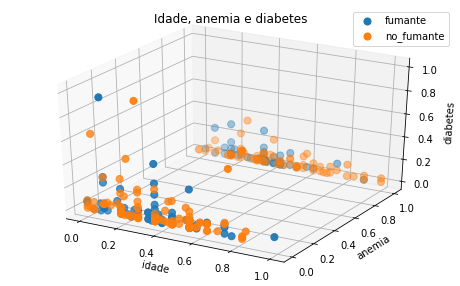

In [ ]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(fumante.age,fumante.anaemia,fumante.creatinine_phosphokinase,s=50,label='fumante')
ax.scatter3D(no_fumante.age,no_fumante.anaemia,no_fumante.creatinine_phosphokinase,s=50,label='no_fumante')
plt.legend()
ax.set_xlabel('idade')
ax.set_ylabel('anemia')
ax.set_zlabel('diabetes')
plt.title('Idade, anemia e diabetes')
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (25,20)

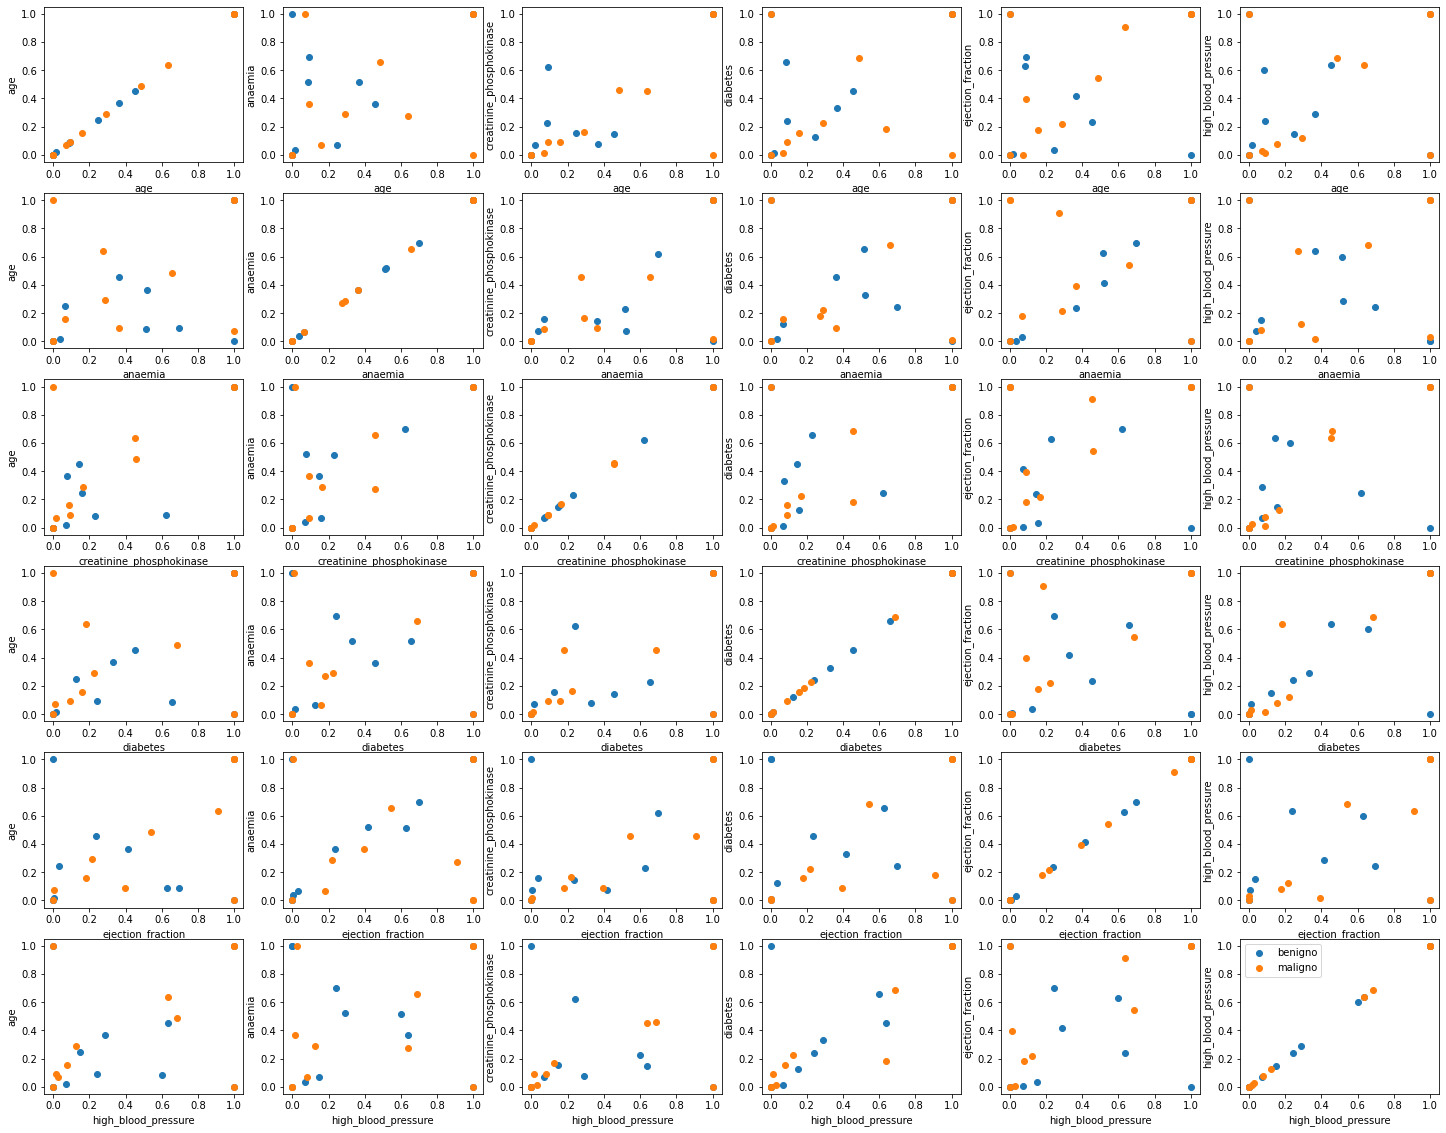

In [ ]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(fumante.iloc[i],fumante.iloc[j],label='benigno')
    axs[i,j].scatter(no_fumante.iloc[i],no_fumante.iloc[j],label='maligno')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

# **Avaliando o modelo**

 **Métricas para quando se conhecem as classes**


**Acurácia**
> * similar a métrica de classificação

In [ ]:
#Calculando Acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(Y,labels)
round(acuracia,3)

0.538

**Índice Rand Ajustado**
> * Mede a similaridade de duas atribuições, ignorando permutações

In [ ]:
#Calculando Rand Ajustado
from sklearn.metrics import adjusted_rand_score
rand_score = adjusted_rand_score(Y,labels)
rand_score

-0.00037189751712351496

**Scores baseados em informação mútua**
> * Mede a concordância entre duas atribuções, ignorando permutações

In [ ]:
#Calculando Informação Mútua
from sklearn.metrics import adjusted_mutual_info_score
mutual_info = adjusted_mutual_info_score(Y,labels)
mutual_info

0.01435301554330748

**Fowlkes-Mallows scores**
> * Calculado como a média geométrica de precisão e recall

In [ ]:
#Calculando Fowlkes-Mallows
from sklearn.metrics import fowlkes_mallows_score
fm = fowlkes_mallows_score(Y,labels)
fm


0.536409138312417

# **Métricas quando as classes não são conhecidas**

**Índice Davies-Boldin**
> * indica uma smiliaridade média entre os grupos

In [ ]:
#excluindo a coluna diagnóstico
X = X.drop(columns=['smoking'])

In [ ]:
#Calculando Índice Davies-Boldin
from sklearn.metrics import davies_bouldin_score
db = davies_bouldin_score(X,labels)
db

1.780117686102779

**Coeficiente de Silhueta**

> * a distância média entre uma instância e todas as instâncias no mesmo grupo
> * a distância média entre uma instância e todas as instâncias no grupo mais próximo

In [ ]:
#Calculando Coeficiente de Silhueta
from sklearn.metrics import silhouette_score
ss = silhouette_score(X,labels,metric='euclidean')
ss

0.24081257521548233

**Índice Calinski-Harabasz**

> * Mede a dispersão entre grupos e intra-grupos para todos os grupos

In [ ]:
#Calculando Índice Calinski-Harabasz
from sklearn.metrics import calinski_harabasz_score
ch = calinski_harabasz_score(X,labels)
ch

89.19242921879727

#**Agrupamento Hierárquico**

**Agrupamento Hierárquico Aglomerativo**
> * Cria-se grupos a partir de folhas

**Definindo modelo e realizando o agrupamento**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

labels_hierarquico

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**avaliando o Modelo**

In [ ]:
#acurácia
acuracia = accuracy_score(Y,labels_hierarquico)
round(acuracia,3)

0.475

In [ ]:
#índice rand ajustado
rand_score = adjusted_rand_score(Y,labels_hierarquico)
rand_score

-0.0027768201007691666

In [ ]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(Y,labels_hierarquico)
mutual_info

0.006324809463850219

In [ ]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(Y,labels_hierarquico)
fm

0.5331633379753242

In [ ]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.792144753693886

In [ ]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.23931789576315501

In [ ]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch


88.71587973805039

# Análise dos resultados

Analisando os resultado obtidos nas avaliações de ambos os modelos, foi possível ver que a próximidade dos resultados tanto aplicando as métricas quando as classes são conhecidas como quando a méétricas não são conhecidas.